In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

## Data directory

In [3]:
sports = 'MLS'

In [4]:
#!pip install seaborn

In [5]:
data_directory = os.path.join('..','data','sports_data/{}/mls.csv'.format(sports))
data_directory_saves = os.path.join( '..','data','clean_data','sports_data/{}/'.format(sports))

In [6]:
data_directory_saves

'../data/clean_data/sports_data/MLS/'

In [7]:
df = pd.read_csv(data_directory)
df.head()

,Date,Season,home,visitor,FT,hgoal,vgoal,hconf,vconf,totgoal,round,leg,hgoalaet,vgoalaet,hpen,vpen
0,1996-04-06,1996,San Jose Earthquakes,DC United,1-0,1,0,West,East,1,regular,NaN,NaN,NaN,NaN,NaN
1,1996-04-13,1996,LA Galaxy,New York Red Bulls,2-1,2,1,West,East,3,regular,NaN,NaN,NaN,NaN,NaN
2,1996-04-13,1996,Tampa Bay Mutiny,New England Revolution,3-2,3,2,East,East,5,regular,NaN,NaN,NaN,NaN,NaN
3,1996-04-13,1996,Columbus Crew,DC United,4-0,4,0,East,East,4,regular,NaN,NaN,NaN,NaN,NaN
4,1996-04-13,1996,Sporting Kansas City,Colorado Rapids,3-0,3,0,West,West,3,regular,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 16 columns):
Date        4995 non-null object
Season      4995 non-null int64
home        4995 non-null object
visitor     4995 non-null object
FT          4995 non-null object
hgoal       4995 non-null int64
vgoal       4995 non-null int64
hconf       4995 non-null object
vconf       4995 non-null object
totgoal     4995 non-null int64
round       4995 non-null object
leg         237 non-null float64
hgoalaet    47 non-null float64
vgoalaet    47 non-null float64
hpen        23 non-null float64
vpen        23 non-null float64
dtypes: float64(5), int64(4), object(7)
memory usage: 624.5+ KB


In [9]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

## Check for missing values

In [10]:
df.apply(lambda x: sum(x.isnull()))

date           0
season         0
home           0
visitor        0
ft             0
hgoal          0
vgoal          0
hconf          0
vconf          0
totgoal        0
round          0
leg         4758
hgoalaet    4948
vgoalaet    4948
hpen        4972
vpen        4972
dtype: int64

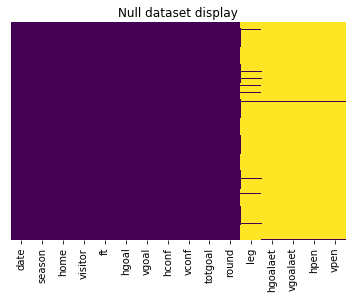

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

# drop unused columns

In [12]:
df.head()

,date,season,home,visitor,ft,hgoal,vgoal,hconf,vconf,totgoal,round,leg,hgoalaet,vgoalaet,hpen,vpen
0,1996-04-06,1996,San Jose Earthquakes,DC United,1-0,1,0,West,East,1,regular,NaN,NaN,NaN,NaN,NaN
1,1996-04-13,1996,LA Galaxy,New York Red Bulls,2-1,2,1,West,East,3,regular,NaN,NaN,NaN,NaN,NaN
2,1996-04-13,1996,Tampa Bay Mutiny,New England Revolution,3-2,3,2,East,East,5,regular,NaN,NaN,NaN,NaN,NaN
3,1996-04-13,1996,Columbus Crew,DC United,4-0,4,0,East,East,4,regular,NaN,NaN,NaN,NaN,NaN
4,1996-04-13,1996,Sporting Kansas City,Colorado Rapids,3-0,3,0,West,West,3,regular,NaN,NaN,NaN,NaN,NaN


In [13]:
df.drop(['hgoalaet','vgoalaet','hpen','vpen','leg','ft','hconf','vconf','totgoal'],axis=1,inplace=True)

In [14]:
df.head()

,date,season,home,visitor,hgoal,vgoal,round
0,1996-04-06,1996,San Jose Earthquakes,DC United,1,0,regular
1,1996-04-13,1996,LA Galaxy,New York Red Bulls,2,1,regular
2,1996-04-13,1996,Tampa Bay Mutiny,New England Revolution,3,2,regular
3,1996-04-13,1996,Columbus Crew,DC United,4,0,regular
4,1996-04-13,1996,Sporting Kansas City,Colorado Rapids,3,0,regular


## Change date column to datetime index

In [15]:
df.date = pd.to_datetime(df.date)
df.index = df['date']
del df['date']

In [16]:
df.head()

,season,home,visitor,hgoal,vgoal,round
date,,,,,,
1996-04-06,1996,San Jose Earthquakes,DC United,1,0,regular
1996-04-13,1996,LA Galaxy,New York Red Bulls,2,1,regular
1996-04-13,1996,Tampa Bay Mutiny,New England Revolution,3,2,regular
1996-04-13,1996,Columbus Crew,DC United,4,0,regular
1996-04-13,1996,Sporting Kansas City,Colorado Rapids,3,0,regular


## Select years from 2010 - 2016

In [17]:
df = df['2010':'2016']

In [18]:
df.head()

,season,home,visitor,hgoal,vgoal,round
date,,,,,,
2010-03-25,2010,Seattle Sounders,Philadelphia Union,2,0,regular
2010-03-27,2010,CD Chivas USA,Colorado Rapids,0,1,regular
2010-03-27,2010,Columbus Crew,Toronto FC,2,0,regular
2010-03-27,2010,FC Dallas,Houston Dynamo,1,1,regular
2010-03-27,2010,New York Red Bulls,Chicago Fire,1,0,regular


## create winner column

In [19]:
df['winner'] = np.where(df['hgoal'] > df['vgoal'], 'home','visitor') 

In [20]:
df.head()

,season,home,visitor,hgoal,vgoal,round,winner
date,,,,,,,
2010-03-25,2010,Seattle Sounders,Philadelphia Union,2,0,regular,home
2010-03-27,2010,CD Chivas USA,Colorado Rapids,0,1,regular,visitor
2010-03-27,2010,Columbus Crew,Toronto FC,2,0,regular,home
2010-03-27,2010,FC Dallas,Houston Dynamo,1,1,regular,visitor
2010-03-27,2010,New York Red Bulls,Chicago Fire,1,0,regular,home


## filter only home games for Dynamo

In [21]:
home_game = df.home == 'Houston Dynamo'

In [22]:
df_home = df[home_game]

In [23]:
df['round'].value_counts()

regular       2194
conf_semi       56
conf_final      24
play_in         16
mls_final        7
Name: round, dtype: int64

In [24]:
df_home.head()

,season,home,visitor,hgoal,vgoal,round,winner
date,,,,,,,
2010-04-01,2010,Houston Dynamo,Real Salt Lake,2,1,regular,home
2010-04-10,2010,Houston Dynamo,LA Galaxy,0,2,regular,visitor
2010-04-17,2010,Houston Dynamo,CD Chivas USA,3,0,regular,home
2010-05-01,2010,Houston Dynamo,Sporting Kansas City,3,0,regular,home
2010-05-05,2010,Houston Dynamo,FC Dallas,0,1,regular,visitor


## Load and clean 2017 data

In [25]:
houston_reg_17 = os.path.join('..','data','sports_data/{}/HOU_17.csv'.format(sports))
houston_plo_17 = os.path.join('..','data','sports_data/{}/HOU_17_plo.csv'.format(sports))

In [26]:
df17r = pd.read_csv(houston_reg_17)
df17p = pd.read_csv(houston_plo_17,names=['day','date','home_team','result','away_team'])

In [27]:
df17r.head()

,day,date,home_team,result,away_team
0,Saturday,March 4,HOU,2-1,Seattle
1,Saturday,March 11,HOU,3-1,Columbus
2,Saturday,March 18,Portland,4-2,HOU
3,Saturday,April 1,HOU,4-1,NY Red Bulls
4,Saturday,April 8,New England,2-0,HOU


## change value from HOU to Houston Dynamo

In [28]:
df17r.home_team.replace({'HOU':'Houston Dynamo'}, inplace=True)
df17r.away_team.replace({'HOU':'Houston Dynamo'}, inplace=True)

In [29]:
df17r.head()

,day,date,home_team,result,away_team
0,Saturday,March 4,Houston Dynamo,2-1,Seattle
1,Saturday,March 11,Houston Dynamo,3-1,Columbus
2,Saturday,March 18,Portland,4-2,Houston Dynamo
3,Saturday,April 1,Houston Dynamo,4-1,NY Red Bulls
4,Saturday,April 8,New England,2-0,Houston Dynamo


## Create round column

In [30]:
df17r['round'] = 'regular'

In [31]:
df17r.head()

,day,date,home_team,result,away_team,round
0,Saturday,March 4,Houston Dynamo,2-1,Seattle,regular
1,Saturday,March 11,Houston Dynamo,3-1,Columbus,regular
2,Saturday,March 18,Portland,4-2,Houston Dynamo,regular
3,Saturday,April 1,Houston Dynamo,4-1,NY Red Bulls,regular
4,Saturday,April 8,New England,2-0,Houston Dynamo,regular


## drop 'day' column

In [32]:
df17r.drop(['day'],axis=1,inplace=True)
df17p.drop(['day'],axis=1,inplace=True)

# create a year column

In [33]:
df17r['year'] = '2017'
df17p['year'] = '2017'

In [34]:
df17r.head()

,date,home_team,result,away_team,round,year
0,March 4,Houston Dynamo,2-1,Seattle,regular,2017
1,March 11,Houston Dynamo,3-1,Columbus,regular,2017
2,March 18,Portland,4-2,Houston Dynamo,regular,2017
3,April 1,Houston Dynamo,4-1,NY Red Bulls,regular,2017
4,April 8,New England,2-0,Houston Dynamo,regular,2017


# combine date and year column to create a correct datetime col

In [35]:
# regular season
df17r['day'] = df17r[['date', 'year']].apply(lambda x: ' '.join(x), axis=1)
# drop year & date
df17r.drop(['year','date'],axis=1,inplace=True)

In [36]:
df17r.head()

,home_team,result,away_team,round,day
0,Houston Dynamo,2-1,Seattle,regular,March 4 2017
1,Houston Dynamo,3-1,Columbus,regular,March 11 2017
2,Portland,4-2,Houston Dynamo,regular,March 18 2017
3,Houston Dynamo,4-1,NY Red Bulls,regular,April 1 2017
4,New England,2-0,Houston Dynamo,regular,April 8 2017


In [37]:
df17r.day = pd.to_datetime(df17r.day)

In [38]:
df17r.head()

,home_team,result,away_team,round,day
0,Houston Dynamo,2-1,Seattle,regular,2017-03-04
1,Houston Dynamo,3-1,Columbus,regular,2017-03-11
2,Portland,4-2,Houston Dynamo,regular,2017-03-18
3,Houston Dynamo,4-1,NY Red Bulls,regular,2017-04-01
4,New England,2-0,Houston Dynamo,regular,2017-04-08


## playoffs

In [39]:
df17p['round'] = 'playoffs'

In [40]:
## playoffs
df17p['day'] = df17p[['date', 'year']].apply(lambda x: '/'.join(x), axis=1)
# drop year & date
df17p.drop(['year','date'],axis=1,inplace=True)

In [41]:
df17p

,home_team,result,away_team,round,day
0,Houston Dynamo,1-0,Kansas City,playoffs,10/26/2017
1,Houston Dynamo,0-0,Portland Tumbers,playoffs,10/30/2017
2,Portland Tumbers,1-2,Houston Dynamo,playoffs,11/5/2017
3,Houston Dynamo,0-2,Seattle,playoffs,11/21/2017
4,Seattle,3-0,Houston Dynamo,playoffs,11/30/2017


In [42]:
df17p.day = pd.to_datetime(df17p.day)

In [43]:
df17p

,home_team,result,away_team,round,day
0,Houston Dynamo,1-0,Kansas City,playoffs,2017-10-26
1,Houston Dynamo,0-0,Portland Tumbers,playoffs,2017-10-30
2,Portland Tumbers,1-2,Houston Dynamo,playoffs,2017-11-05
3,Houston Dynamo,0-2,Seattle,playoffs,2017-11-21
4,Seattle,3-0,Houston Dynamo,playoffs,2017-11-30


## combine 2017 season

In [44]:
df17 = df17p.append(df17r, ignore_index=True)

In [45]:
df17.head()

,home_team,result,away_team,round,day
0,Houston Dynamo,1-0,Kansas City,playoffs,2017-10-26
1,Houston Dynamo,0-0,Portland Tumbers,playoffs,2017-10-30
2,Portland Tumbers,1-2,Houston Dynamo,playoffs,2017-11-05
3,Houston Dynamo,0-2,Seattle,playoffs,2017-11-21
4,Seattle,3-0,Houston Dynamo,playoffs,2017-11-30


## rename columns for 2017 season 

In [46]:
df17.rename(columns={
    'home_team': 'home',
     'away_team': 'visitor',
    'day': 'date',
}, inplace=True)
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
home       39 non-null object
result     39 non-null object
visitor    39 non-null object
round      39 non-null object
date       39 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.6+ KB


In [47]:
df17.head()

,home,result,visitor,round,date
0,Houston Dynamo,1-0,Kansas City,playoffs,2017-10-26
1,Houston Dynamo,0-0,Portland Tumbers,playoffs,2017-10-30
2,Portland Tumbers,1-2,Houston Dynamo,playoffs,2017-11-05
3,Houston Dynamo,0-2,Seattle,playoffs,2017-11-21
4,Seattle,3-0,Houston Dynamo,playoffs,2017-11-30


## Create season col
### datetime index

In [48]:
df17['season'] = '2017'

In [49]:
df17.date = pd.to_datetime(df17.date)
df17.index = df17['date']
del df17['date']

In [50]:
df17.head()

,home,result,visitor,round,season
date,,,,,
2017-10-26,Houston Dynamo,1-0,Kansas City,playoffs,2017
2017-10-30,Houston Dynamo,0-0,Portland Tumbers,playoffs,2017
2017-11-05,Portland Tumbers,1-2,Houston Dynamo,playoffs,2017
2017-11-21,Houston Dynamo,0-2,Seattle,playoffs,2017
2017-11-30,Seattle,3-0,Houston Dynamo,playoffs,2017


## split off result column

In [51]:
df17[['hgoal','vgoal']] = df17.result.str.split('-').apply(pd.Series)

In [52]:
df17.head()

,home,result,visitor,round,season,hgoal,vgoal
date,,,,,,,
2017-10-26,Houston Dynamo,1-0,Kansas City,playoffs,2017,1,0
2017-10-30,Houston Dynamo,0-0,Portland Tumbers,playoffs,2017,0,0
2017-11-05,Portland Tumbers,1-2,Houston Dynamo,playoffs,2017,1,2
2017-11-21,Houston Dynamo,0-2,Seattle,playoffs,2017,0,2
2017-11-30,Seattle,3-0,Houston Dynamo,playoffs,2017,3,0


## create a winner column

In [53]:
df17['winner'] = np.where(df17['hgoal'] > df17['vgoal'], 'home','visitor') 

In [54]:
df17.head()

,home,result,visitor,round,season,hgoal,vgoal,winner
date,,,,,,,,
2017-10-26,Houston Dynamo,1-0,Kansas City,playoffs,2017,1,0,home
2017-10-30,Houston Dynamo,0-0,Portland Tumbers,playoffs,2017,0,0,visitor
2017-11-05,Portland Tumbers,1-2,Houston Dynamo,playoffs,2017,1,2,visitor
2017-11-21,Houston Dynamo,0-2,Seattle,playoffs,2017,0,2,visitor
2017-11-30,Seattle,3-0,Houston Dynamo,playoffs,2017,3,0,home


## filter only home games

In [55]:
home_game = df17.home == 'Houston Dynamo'

In [56]:
df17 = df17[home_game]

In [57]:
cols = ['season', 'home', 'visitor', 'hgoal', 'vgoal', 'round', 'winner']
df17 = df17.reindex(columns=cols)

In [58]:
df17.head()

,season,home,visitor,hgoal,vgoal,round,winner
date,,,,,,,
2017-03-04,2017,Houston Dynamo,Seattle,2,1,regular,home
2017-03-11,2017,Houston Dynamo,Columbus,3,1,regular,home
2017-04-01,2017,Houston Dynamo,NY Red Bulls,4,1,regular,home
2017-04-15,2017,Houston Dynamo,Minnesota,2,2,regular,visitor
2017-04-22,2017,Houston Dynamo,San Jose,2,0,regular,home


In [59]:
df_home.head()

,season,home,visitor,hgoal,vgoal,round,winner
date,,,,,,,
2010-04-01,2010,Houston Dynamo,Real Salt Lake,2,1,regular,home
2010-04-10,2010,Houston Dynamo,LA Galaxy,0,2,regular,visitor
2010-04-17,2010,Houston Dynamo,CD Chivas USA,3,0,regular,home
2010-05-01,2010,Houston Dynamo,Sporting Kansas City,3,0,regular,home
2010-05-05,2010,Houston Dynamo,FC Dallas,0,1,regular,visitor


## combine df17 with df_home

In [60]:
data = df_home.append(df17)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 2010-04-01 to 2017-10-22
Data columns (total 7 columns):
season     140 non-null object
home       140 non-null object
visitor    140 non-null object
hgoal      140 non-null object
vgoal      140 non-null object
round      140 non-null object
winner     140 non-null object
dtypes: object(7)
memory usage: 8.8+ KB


In [62]:
data.head()

,season,home,visitor,hgoal,vgoal,round,winner
date,,,,,,,
2010-04-01,2010,Houston Dynamo,Real Salt Lake,2,1,regular,home
2010-04-10,2010,Houston Dynamo,LA Galaxy,0,2,regular,visitor
2010-04-17,2010,Houston Dynamo,CD Chivas USA,3,0,regular,home
2010-05-01,2010,Houston Dynamo,Sporting Kansas City,3,0,regular,home
2010-05-05,2010,Houston Dynamo,FC Dallas,0,1,regular,visitor


## Save dataset

In [63]:
data.to_csv(data_directory_saves+'Dynamo_2010_2017.csv')